In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.preprocessing import Imputer


In [50]:
data = pd.read_csv("nassCDS.csv", index_col ="dvcat" ) 
  
# dropping passed values 
data.drop(["10-24"], inplace = True)
data

  

,Unnamed: 0,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
dvcat,,,,,,,,,,,,,,,
25-39,1,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
25-39,4,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
25-39,5,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1
40-54,6,25.069,alive,none,belted,1,f,22,1997,1985.0,unavail,driver,0,3.0,2:11:2
55+,7,27.078,alive,none,belted,1,m,22,1997,1984.0,unavail,driver,0,3.0,2:13:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25-39,26201,225.957,alive,airbag,none,0,m,28,2002,2001.0,nodeploy,driver,0,1.0,82:99:2
25-39,26212,261.217,alive,airbag,belted,0,f,45,2002,1997.0,nodeploy,driver,0,2.0,82:106:2
25-39,26213,3179.688,alive,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1


In [52]:
to_drop = ['sex','abcat','caseid']
data.drop(to_drop, inplace=True, axis=1)

In [53]:
data


,Unnamed: 0,weight,dead,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
dvcat,,,,,,,,,,,,
25-39,1,25.069,alive,none,belted,1,26,1997,1990.0,driver,0,3.0
25-39,4,495.444,alive,airbag,belted,1,53,1997,1995.0,driver,1,1.0
25-39,5,25.069,alive,none,belted,1,32,1997,1988.0,driver,0,3.0
40-54,6,25.069,alive,none,belted,1,22,1997,1985.0,driver,0,3.0
55+,7,27.078,alive,none,belted,1,22,1997,1984.0,driver,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25-39,26201,225.957,alive,airbag,none,0,28,2002,2001.0,driver,0,1.0
25-39,26212,261.217,alive,airbag,belted,0,45,2002,1997.0,driver,0,2.0
25-39,26213,3179.688,alive,none,belted,1,17,2002,1985.0,driver,0,0.0


In [54]:
new_names =  {'Unnamed: 0': 'Country'}
data.rename(columns=new_names, inplace=True)
data.head()

,Country,weight,dead,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
dvcat,,,,,,,,,,,,
25-39,1,25.069,alive,none,belted,1,26,1997,1990.0,driver,0,3.0
25-39,4,495.444,alive,airbag,belted,1,53,1997,1995.0,driver,1,1.0
25-39,5,25.069,alive,none,belted,1,32,1997,1988.0,driver,0,3.0
40-54,6,25.069,alive,none,belted,1,22,1997,1985.0,driver,0,3.0
55+,7,27.078,alive,none,belted,1,22,1997,1984.0,driver,0,3.0


In [55]:
to_drop = ['Country']
data.drop(to_drop, inplace=True, axis=1)

In [56]:
data

,weight,dead,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
dvcat,,,,,,,,,,,
25-39,25.069,alive,none,belted,1,26,1997,1990.0,driver,0,3.0
25-39,495.444,alive,airbag,belted,1,53,1997,1995.0,driver,1,1.0
25-39,25.069,alive,none,belted,1,32,1997,1988.0,driver,0,3.0
40-54,25.069,alive,none,belted,1,22,1997,1985.0,driver,0,3.0
55+,27.078,alive,none,belted,1,22,1997,1984.0,driver,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
25-39,225.957,alive,airbag,none,0,28,2002,2001.0,driver,0,1.0
25-39,261.217,alive,airbag,belted,0,45,2002,1997.0,driver,0,2.0
25-39,3179.688,alive,none,belted,1,17,2002,1985.0,driver,0,0.0


In [61]:
new_names =  {"dead": "stateOfPerson"}
data.rename(columns=new_names, inplace=True)
data.head()

,weight,stateOfPerson,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
dvcat,,,,,,,,,,,
25-39,25.069,1,none,belted,1,26,1997,1990.0,driver,0,3.0
25-39,495.444,1,airbag,belted,1,53,1997,1995.0,driver,1,1.0
25-39,25.069,1,none,belted,1,32,1997,1988.0,driver,0,3.0
40-54,25.069,1,none,belted,1,22,1997,1985.0,driver,0,3.0
55+,27.078,1,none,belted,1,22,1997,1984.0,driver,0,3.0


In [65]:
data

,weight,stateOfPerson,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
dvcat,,,,,,,,,,,
25-39,25.069,1,0,belted,1,26,1997,1990.0,driver,0,3.0
25-39,495.444,1,1,belted,1,53,1997,1995.0,driver,1,1.0
25-39,25.069,1,0,belted,1,32,1997,1988.0,driver,0,3.0
40-54,25.069,1,0,belted,1,22,1997,1985.0,driver,0,3.0
55+,27.078,1,0,belted,1,22,1997,1984.0,driver,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
25-39,225.957,1,1,none,0,28,2002,2001.0,driver,0,1.0
25-39,261.217,1,1,belted,0,45,2002,1997.0,driver,0,2.0
25-39,3179.688,1,0,belted,1,17,2002,1985.0,driver,0,0.0


In [66]:
n={"seatbelt":{"belted":1,"none":0}}
data.replace(n,inplace=True)

In [67]:
data.head()

,weight,stateOfPerson,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
dvcat,,,,,,,,,,,
25-39,25.069,1,0,1,1,26,1997,1990.0,driver,0,3.0
25-39,495.444,1,1,1,1,53,1997,1995.0,driver,1,1.0
25-39,25.069,1,0,1,1,32,1997,1988.0,driver,0,3.0
40-54,25.069,1,0,1,1,22,1997,1985.0,driver,0,3.0
55+,27.078,1,0,1,1,22,1997,1984.0,driver,0,3.0


In [68]:
n={"occRole":{"driver":1,"pass":0}}
data.replace(n,inplace=True)

In [75]:
data.head()

,weight,stateOfPerson,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
dvcat,,,,,,,,,,,
25-39,25.069,1,0,1,1,26,1997,1990.0,1,0,3.0
25-39,495.444,1,1,1,1,53,1997,1995.0,1,1,1.0
25-39,25.069,1,0,1,1,32,1997,1988.0,1,0,3.0
40-54,25.069,1,0,1,1,22,1997,1985.0,1,0,3.0
55+,27.078,1,0,1,1,22,1997,1984.0,1,0,3.0


In [76]:
scaler = StandardScaler() 
data_scaled= scaler.fit_transform(data) 

In [77]:
data_scaled

array([[-0.2501408 ,  0.29435613, -0.98876829, ...,  0.52074945,
        -0.73861298,  0.70505875],
       [ 0.17957085,  0.29435613,  1.0113593 , ...,  0.52074945,
         1.35388902, -0.92229175],
       [-0.2501408 ,  0.29435613, -0.98876829, ...,  0.52074945,
        -0.73861298,  0.70505875],
       ...,
       [ 2.63176525,  0.29435613, -0.98876829, ...,  0.52074945,
        -0.73861298, -1.735967  ],
       [-0.26347408,  0.29435613,  1.0113593 , ...,  0.52074945,
         1.35388902, -1.735967  ],
       [-0.26347408,  0.29435613,  1.0113593 , ..., -1.92030926,
         1.35388902, -1.735967  ]])

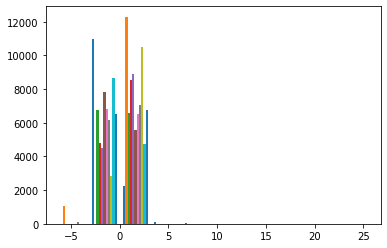

In [78]:
pyplot.hist(data_scaled)
pyplot.show()

In [93]:
#inorder to normalize the data,nan infinity values has to be removed 
df=data
df[df==np.inf]=np.nan
df.fillna(df.mean(),inplace=True)

In [94]:
def replace_missing_value(df, number_features):

    imputer = Imputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [95]:
num = ["weight","stateOfPerson","airbag","seatbelt","frontal","ageOFocc","yearacc","yearVeh","occRole","deploy","injSeverity"]

In [96]:
from sklearn.preprocessing import Imputer
def replace_missing_value(df, number_features):

    imputer = Imputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def
num = ["weight","stateOfPerson","airbag","seatbelt","frontal","ageOFocc","yearacc","yearVeh","occRole","deploy","injSeverity"]
df_res=replace_missing_value(df,num)

C:\Users\gagan\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [97]:
df_res

,weight,stateOfPerson,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity
0,25.069,1.0,0.0,1.0,1.0,26.0,1997.0,1990.0,1.0,0.0,3.0
1,495.444,1.0,1.0,1.0,1.0,53.0,1997.0,1995.0,1.0,1.0,1.0
2,25.069,1.0,0.0,1.0,1.0,32.0,1997.0,1988.0,1.0,0.0,3.0
3,25.069,1.0,0.0,1.0,1.0,22.0,1997.0,1985.0,1.0,0.0,3.0
4,27.078,1.0,0.0,1.0,1.0,22.0,1997.0,1984.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
13364,225.957,1.0,1.0,0.0,0.0,28.0,2002.0,2001.0,1.0,0.0,1.0
13365,261.217,1.0,1.0,1.0,0.0,45.0,2002.0,1997.0,1.0,0.0,2.0
13366,3179.688,1.0,0.0,1.0,1.0,17.0,2002.0,1985.0,1.0,0.0,0.0
13367,10.474,1.0,1.0,1.0,1.0,18.0,2002.0,1999.0,1.0,1.0,0.0


In [98]:
#Scaling the data now
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df_res) 

In [99]:
X_scaled

array([[-0.2501408 ,  0.29435613, -0.98876829, ...,  0.52074945,
        -0.73861298,  0.70696504],
       [ 0.17957085,  0.29435613,  1.0113593 , ...,  0.52074945,
         1.35388902, -0.92478537],
       [-0.2501408 ,  0.29435613, -0.98876829, ...,  0.52074945,
        -0.73861298,  0.70696504],
       ...,
       [ 2.63176525,  0.29435613, -0.98876829, ...,  0.52074945,
        -0.73861298, -1.74066057],
       [-0.26347408,  0.29435613,  1.0113593 , ...,  0.52074945,
         1.35388902, -1.74066057],
       [-0.26347408,  0.29435613,  1.0113593 , ..., -1.92030926,
         1.35388902, -1.74066057]])

In [100]:
X_normalized = normalize(X_scaled) 
X_normalized

array([[-0.10062139,  0.1184074 , -0.39774093, ...,  0.20947615,
        -0.29711371,  0.28438304],
       [ 0.06175681,  0.101233  ,  0.34781995, ...,  0.17909268,
         0.46562049, -0.31804602],
       [-0.09973003,  0.11735848, -0.39421752, ...,  0.20762049,
        -0.29448171,  0.28186382],
       ...,
       [ 0.62180412,  0.06954718, -0.23361514, ...,  0.12303687,
        -0.17451123, -0.41126385],
       [-0.07590689,  0.084804  ,  0.29137262, ...,  0.15002792,
         0.39005543, -0.50148432],
       [-0.06673552,  0.07455765,  0.25616784, ..., -0.48639635,
         0.34292741, -0.44089302]])

In [101]:
#Normalizing the Data
X_normalized = pd.DataFrame(X_normalized) 
X_normalized

,0,1,2,3,4,5,6,7,8,9,10
0,-0.100621,0.118407,-0.397741,0.301359,0.286293,-0.238336,-0.591452,-0.158827,0.209476,-0.297114,0.284383
1,0.061757,0.101233,0.347820,0.257649,0.244768,0.325005,-0.505665,0.165257,0.179093,0.465620,-0.318046
2,-0.099730,0.117358,-0.394218,0.298690,0.283757,-0.100002,-0.586213,-0.297021,0.207620,-0.294482,0.281864
3,-0.088664,0.104336,-0.350475,0.265547,0.252271,-0.290751,-0.521166,-0.450229,0.184583,-0.261806,0.250588
4,-0.085502,0.101359,-0.340473,0.257969,0.245072,-0.282454,-0.506294,-0.497665,0.179315,-0.254335,0.243437
...,...,...,...,...,...,...,...,...,...,...,...
13364,-0.019828,0.087608,0.301006,-0.397275,-0.418181,-0.142444,0.438878,0.455649,0.154988,-0.219830,-0.275239
13365,-0.012498,0.106924,0.367373,0.272133,-0.510383,0.177795,0.535644,0.301736,0.189161,-0.268299,-0.039561
13366,0.621804,0.069547,-0.233615,0.177005,0.168156,-0.261076,0.348402,-0.300108,0.123037,-0.174511,-0.411264
13367,-0.075907,0.084804,0.291373,0.215835,0.205045,-0.301944,0.424832,0.340190,0.150028,0.390055,-0.501484


In [103]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head() 

,P1,P2
0,-0.569513,-0.048900
1,0.542049,-0.121319
2,-0.628123,-0.046786
3,-0.656799,-0.038690
4,-0.667618,-0.036728


In [170]:
#Trying for larger samples with min_samples as 10
db_default = DBSCAN(eps = 0.0750, min_samples = 10).fit(X_principal) 
db_default
labels = db_default.labels_ 



In [153]:
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1]='c'
cvec = [colours[i] for i in labels]

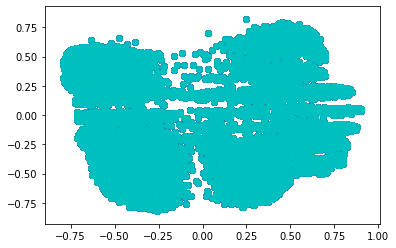

In [160]:
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='c'); 


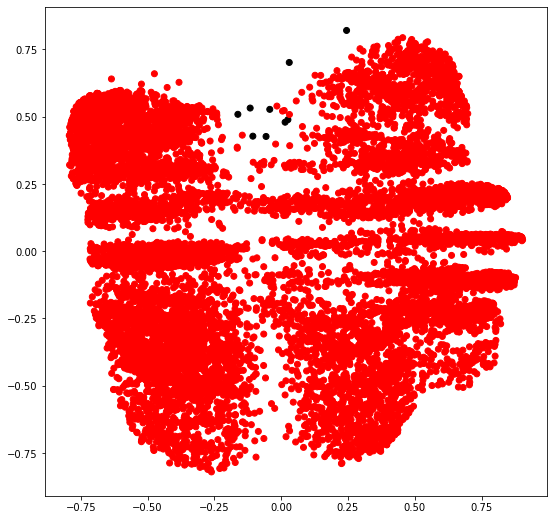

In [161]:

# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 


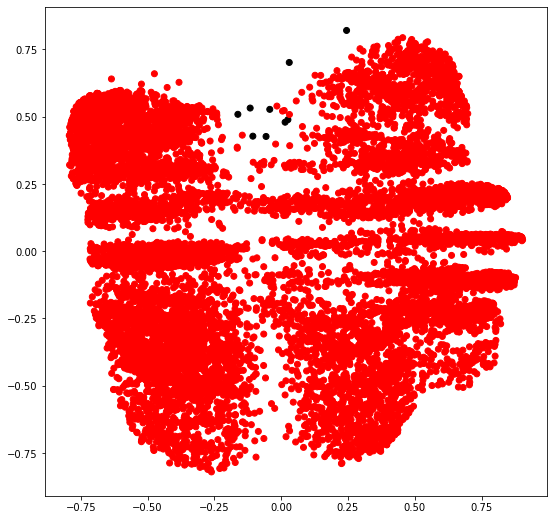

In [162]:

# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

In [163]:
#Trying for larger samples with min_samples as 50
db = DBSCAN(eps = 0.0750, min_samples = 50).fit(X_principal) 
labels1 = db.labels_ 



In [164]:


colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

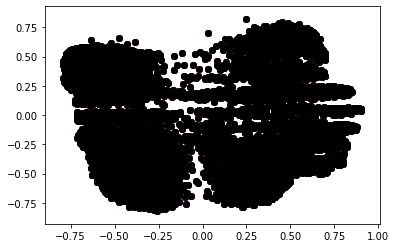

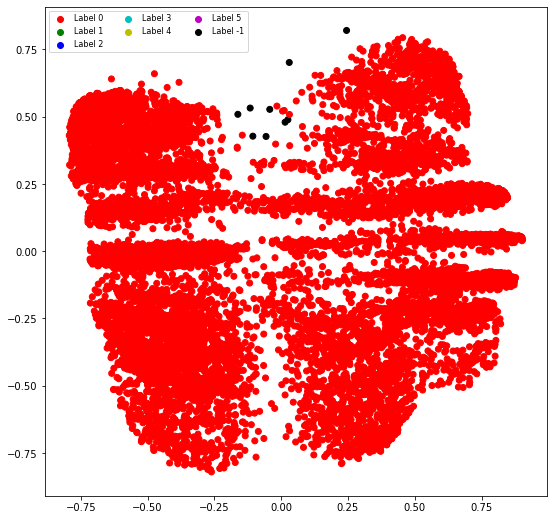

In [165]:

cvec = [colours1[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6]) 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), ('Label 0', 'Label 1', 'Label 2', 'Label 3 ','Label 4', 'Label 5', 'Label -1'),
                                   scatterpoints = 1, loc ='upper left', ncol = 3, fontsize = 8)
plt.show() 

